In [1]:
import numpy as np
np.set_printoptions(precision=2, suppress=True)

# Спектральное разложение

Спектральное разложение матрицы — это представление **квадратной** матрицы ${\displaystyle A}$ в виде произведения трёх матриц, ${\displaystyle A=V\Lambda V^{-1}}$, где 

- ${\displaystyle V}$ — матрица, столбцы которой являются ортонормированными собственными векторами матрицы ${\displaystyle A}$, 
- ${\displaystyle \Lambda }$  — диагональная матрица с соответствующими собственными значениями на главной диагонали, 
- ${\displaystyle V^{-1}}$ — матрица, обратная матрице ${\displaystyle V}$.

Обозначение из лекций: $X = S^T \cdot  D \cdot S$

$$P(x, y, z) = x^2 + 2 y^2 - 3 z^2 + 4 xy + 10 yz - 2 xz$$

$$
P(x, y, z) =
\left(
\begin{array}{ccc}
x & y & z
\end{array}
\right)
\left(
\begin{array}{ccc}
1 & 2 & -1 \\
2 & 2 & 5 \\
-1 & 5 & -3 \end{array}
\right)
\left(
\begin{array}{c}
x \\
y \\
z \end{array}
\right)
$$

In [2]:
A = np.array([[1.0, 2.0, -1.0],
              [2.0, 2.0, 5.0],
              [-1.0, 5.0, -3.0]])
print A

[[ 1.  2. -1.]
 [ 2.  2.  5.]
 [-1.  5. -3.]]


In [3]:
v, W = np.linalg.eigh(A)
D = np.diag(v)
S = W.T

In [4]:
v

array([-6.58,  1.15,  5.43])

In [5]:
print 'D =\n', D
print 'S=\n', S

D =
[[-6.58  0.    0.  ]
 [ 0.    1.15  0.  ]
 [ 0.    0.    5.43]]
S=
[[-0.25  0.53 -0.81]
 [ 0.93 -0.11 -0.35]
 [-0.27 -0.84 -0.47]]


In [6]:
print np.dot(S.T, S)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [7]:
print np.dot(np.dot(S.T, D), S)

[[ 1.  2. -1.]
 [ 2.  2.  5.]
 [-1.  5. -3.]]


Таким образом,
$$P(x, y, z) = -6.58 \cdot \tilde{x}^2 + 1.15 \cdot \tilde{y}^2 + 5.43 \cdot \tilde{z}^2,$$
где
$$
\left(
\begin{array}{c}
\tilde{x} \\
\tilde{y} \\
\tilde{z} \end{array}
\right) =
S
\left(
\begin{array}{c}
x \\
y \\
z \end{array}
\right),
$$ т.е.
$$
\tilde{x} = -0.25 x + 0.53 y - 0.81 z,
$$
$$
\tilde{y} = 0.93 x - 0.11 y - 0.35 z,
$$
$$
\tilde{z} = -0.27 x - 0.84 y - 0.47 z.
$$

<img src="https://habrastorage.org/files/a0c/1e6/ad2/a0c1e6ad2e8340dfb6517dc6d1921635.jpg">

<img src="https://upload.wikimedia.org/wikipedia/ru/4/4a/FirstPrincipalComponent.jpg">

# Сингулярное разложение

Сингулярным разложением матрицы ${\displaystyle M}$ порядка $m\times n$ является разложение вида $M=U\Sigma V^{*}$, где 

- $\Sigma$  — матрица размера $m\times n$ с неотрицательными элементами, у которой элементы, лежащие на главной диагонали — это сингулярные числа (а все элементы, не лежащие на главной диагонали, являются нулевыми), 
- а матрицы $U$ (порядка $m$) и $V$ (порядка $n$) — это две унитарные матрицы, состоящие из левых и правых сингулярных векторов соответственно (а $V^*$ — это сопряжённо-транспонированная матрица к $V$).


Обозначение из лекций: $X = U \cdot  D \cdot V$

In [8]:
X = np.array([[1, 2, 0],
              [0, 0, 5],
              [3, -4, 2],
              [1, 6, 5],
              [0, 1, 0]])
print X

[[ 1  2  0]
 [ 0  0  5]
 [ 3 -4  2]
 [ 1  6  5]
 [ 0  1  0]]


In [9]:
U, s, W = np.linalg.svd(X)

V = W.T

D = np.zeros_like(X, dtype=float)
D[np.diag_indices(min(X.shape))] = s

In [10]:
s

array([ 8.82,  6.14,  2.53])

In [11]:
print X.shape
print U.shape, D.shape, V.shape

(5L, 3L)
(5L, 5L) (5L, 3L) (3L, 3L)


In [12]:
print np.dot(U.T, U)

[[ 1.  0. -0. -0. -0.]
 [ 0.  1.  0. -0.  0.]
 [-0.  0.  1. -0. -0.]
 [-0. -0. -0.  1. -0.]
 [-0.  0. -0. -0.  1.]]


In [13]:
print D

[[ 8.82  0.    0.  ]
 [ 0.    6.14  0.  ]
 [ 0.    0.    2.53]
 [ 0.    0.    0.  ]
 [ 0.    0.    0.  ]]


In [14]:
print np.dot(V.T, V)

[[ 1.  0.  0.]
 [ 0.  1. -0.]
 [ 0. -0.  1.]]


In [15]:
np.dot(np.dot(U, D), V.T)

array([[ 1.,  2.,  0.],
       [ 0., -0.,  5.],
       [ 3., -4.,  2.],
       [ 1.,  6.,  5.],
       [-0.,  1.,  0.]])

Можно представить сингулярное разложение в виде:
    
$$a(i,j) = \lambda_1u_1(i)v_1(j) + \lambda_2u_2(i)v_2(j) + ...$$

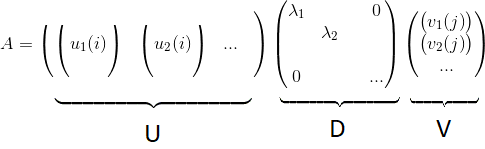